# **Data Description**

## Dataset Overview

The dataset contains real-time snapshots of DublinBikes station statuses collected between **01 January 2018 and 01 October 2021**. Each observation records the status of a specific station at a specific time.

The key variables are:

| Column                 | Description                                                               |
|------------------------|---------------------------------------------------------------------------|
| `STATION ID`           | Unique identifier for the station                                          |
| `TIME`                 | Timestamp of the snapshot (will be parsed into date/time features)         |
| `LAST UPDATED`         | Time of last system update                                                 |
| `NAME`                 | Station name (e.g., “BLESSINGTON STREET”)                                  |
| `BIKE STANDS`          | Total number of bike stands at the station                                 |
| `AVAILABLE BIKE STANDS`| Number of empty stands available                                           |
| `AVAILABLE BIKES`      | Number of bikes available to users                                         |
| `STATUS`               | Operational status (e.g., "Open")                                          |
| `ADDRESS`              | Street address of the station                                              |
| `LATITUDE`, `LONGITUDE`| Geographic location of the station                                         |

## Data Preparation Plan

We will engineer several new variables from the raw columns to enable meaningful analysis:

- `HOUR` and `DAY OF WEEK`: extracted from the `TIME` field
- `WEEKEND`: binary flag for Saturday/Sunday
- `UTILIZATION RATE`: derived as  
  \[
  \text{Utilization} = \frac{\text{AVAILABLE BIKES}}{\text{BIKE STANDS}}
  \]

### Variable Types Summary

| Variable                  | Type         | Role in Analysis             |
|---------------------------|--------------|-------------------------------|
| `AVAILABLE BIKES`         | Numeric      | **Dependent variable**        |
| `TIME` (parsed to HOUR)   | Categorical  | Independent (temporal factor)|
| `DAY OF WEEK`, `WEEKEND`  | Categorical  | Independent (calendar factor)|
| `BIKE STANDS`             | Numeric      | Independent (station size)   |
| `STATION NAME / ID`       | Categorical  | Grouping factor (location)   |


## Descriptive Statistics (to be included in output)

- Summary statistics (mean, median, std) of:
  - `AVAILABLE BIKES`
  - `UTILIZATION RATE`
  - Grouped stats by `DAY OF WEEK`, `STATION NAME`, `HOUR`
- Visuals:
  - Histogram of bike availability
  - Boxplots by hour/day/station
  - Heatmaps or line plots showing variation over time

These summaries will help inform which tests are appropriate and whether assumptions for parametric testing are met.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dublin_bikes_raw = pd.read_parquet("data/dublin_bikes_raw.parquet")

In [4]:
dublin_bikes_raw

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,1,2018-08-01 12:30:02,2018-08-01 12:26:05,CLARENDON ROW,31,1,30,Open,Clarendon Row,53.340927,-6.262501
1,1,2018-08-01 12:35:02,2018-08-01 12:33:03,CLARENDON ROW,31,2,29,Open,Clarendon Row,53.340927,-6.262501
2,1,2018-08-01 12:40:02,2018-08-01 12:33:03,CLARENDON ROW,31,2,29,Open,Clarendon Row,53.340927,-6.262501
3,1,2018-08-01 12:45:02,2018-08-01 12:43:12,CLARENDON ROW,31,2,29,Open,Clarendon Row,53.340927,-6.262501
4,1,2018-08-01 12:50:02,2018-08-01 12:44:37,CLARENDON ROW,31,3,28,Open,Clarendon Row,53.340927,-6.262501
...,...,...,...,...,...,...,...,...,...,...,...
37986396,507,2022-01-01 23:35:02,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,Open,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.354630,-6.242615
37986397,507,2022-01-01 23:40:02,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,Open,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.354630,-6.242615
37986398,507,2022-01-01 23:45:02,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,Open,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.354630,-6.242615
37986399,507,2022-01-01 23:50:02,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,Open,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.354630,-6.242615


In [5]:
dublin_bikes_raw.tail()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
37986396,507,2022-01-01 23:35:02,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,Open,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.35463,-6.242615
37986397,507,2022-01-01 23:40:02,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,Open,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.35463,-6.242615
37986398,507,2022-01-01 23:45:02,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,Open,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.35463,-6.242615
37986399,507,2022-01-01 23:50:02,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,Open,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.35463,-6.242615
37986400,507,2022-01-01 23:55:02,2021-11-18 07:11:16,ORIEL STREET TEST TERMINAL,1,0,1,Open,"JCDecaux Ireland, 52 Oriel Street Lower, Dublin 1",53.35463,-6.242615


In [6]:
# Check for null values in each column
dublin_bikes_raw.isnull().sum()

STATION ID               0
TIME                     0
LAST UPDATED             0
NAME                     0
BIKE STANDS              0
AVAILABLE BIKE STANDS    0
AVAILABLE BIKES          0
STATUS                   0
ADDRESS                  0
LATITUDE                 0
LONGITUDE                0
dtype: int64

In [7]:
# Convert TIME column to datetime
dublin_bikes_raw['TIME'] = pd.to_datetime(dublin_bikes_raw['TIME'], format="%Y-%m-%d %H:%M:%S")
 # Changed the format to match the actual format in the data
dublin_bikes_raw['LAST UPDATED'] = pd.to_datetime(dublin_bikes_raw['LAST UPDATED'], format="%Y-%m-%d %H:%M:%S")

# Extract useful features
dublin_bikes_raw['HOUR'] = dublin_bikes_raw['TIME'].dt.hour
dublin_bikes_raw['DAY'] = dublin_bikes_raw['TIME'].dt.day_name()
dublin_bikes_raw['WEEKEND'] = dublin_bikes_raw['DAY'].isin(['Saturday', 'Sunday'])

In [8]:
dublin_bikes_raw['USED_BIKES'] = dublin_bikes_raw['BIKE STANDS'] - dublin_bikes_raw['AVAILABLE BIKE STANDS']

In [9]:
required_columns = [
    'STATION ID', 'AVAILABLE BIKE STANDS', 'AVAILABLE BIKES',
    'BIKE STANDS', 'TIME', 'DAY','NAME','HOUR', 'USED_BIKES', 'WEEKEND'
]

dublin_bikes_raw = dublin_bikes_raw[required_columns]
dublin_bikes_cleaned = dublin_bikes_raw.dropna()

# Step 4: Save cleaned data
dublin_bikes_cleaned.to_parquet('dublin_bikes_cleaned.parquet', index=False)

In [10]:
dublin_bikes_cleaned.shape

(37986401, 10)

In [11]:
dublin_bikes_cleaned.head(10)

,STATION ID,AVAILABLE BIKE STANDS,AVAILABLE BIKES,BIKE STANDS,TIME,DAY,NAME,HOUR,USED_BIKES,WEEKEND
0,1,1,30,31,2018-08-01 12:30:02,Wednesday,CLARENDON ROW,12,30,False
1,1,2,29,31,2018-08-01 12:35:02,Wednesday,CLARENDON ROW,12,29,False
2,1,2,29,31,2018-08-01 12:40:02,Wednesday,CLARENDON ROW,12,29,False
3,1,2,29,31,2018-08-01 12:45:02,Wednesday,CLARENDON ROW,12,29,False
4,1,3,28,31,2018-08-01 12:50:02,Wednesday,CLARENDON ROW,12,28,False
5,1,3,28,31,2018-08-01 12:55:02,Wednesday,CLARENDON ROW,12,28,False
6,1,16,15,31,2018-08-01 13:00:01,Wednesday,CLARENDON ROW,13,15,False
7,1,14,17,31,2018-08-01 13:05:01,Wednesday,CLARENDON ROW,13,17,False
8,1,15,16,31,2018-08-01 13:10:02,Wednesday,CLARENDON ROW,13,16,False
9,1,15,16,31,2018-08-01 13:15:02,Wednesday,CLARENDON ROW,13,16,False


In [12]:
dublin_bikes_cleaned.tail()

,STATION ID,AVAILABLE BIKE STANDS,AVAILABLE BIKES,BIKE STANDS,TIME,DAY,NAME,HOUR,USED_BIKES,WEEKEND
37986396,507,0,1,1,2022-01-01 23:35:02,Saturday,ORIEL STREET TEST TERMINAL,23,1,True
37986397,507,0,1,1,2022-01-01 23:40:02,Saturday,ORIEL STREET TEST TERMINAL,23,1,True
37986398,507,0,1,1,2022-01-01 23:45:02,Saturday,ORIEL STREET TEST TERMINAL,23,1,True
37986399,507,0,1,1,2022-01-01 23:50:02,Saturday,ORIEL STREET TEST TERMINAL,23,1,True
37986400,507,0,1,1,2022-01-01 23:55:02,Saturday,ORIEL STREET TEST TERMINAL,23,1,True


#**Summary Statistics**

In [14]:
dublin_bikes_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37986401 entries, 0 to 37986400
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   STATION ID             int64         
 1   AVAILABLE BIKE STANDS  int64         
 2   AVAILABLE BIKES        int64         
 3   BIKE STANDS            int64         
 4   TIME                   datetime64[ns]
 5   DAY                    object        
 6   NAME                   object        
 7   HOUR                   int32         
 8   USED_BIKES             int64         
 9   WEEKEND                bool          
dtypes: bool(1), datetime64[ns](1), int32(1), int64(5), object(2)
memory usage: 2.4+ GB


In [15]:
dublin_bikes_cleaned.describe()

,STATION ID,AVAILABLE BIKE STANDS,AVAILABLE BIKES,BIKE STANDS,TIME,HOUR,USED_BIKES
count,3.798640e+07,3.798640e+07,3.798640e+07,3.798640e+07,37986401,3.798640e+07,3.798640e+07
mean,5.978558e+01,2.041691e+01,1.146877e+01,3.208244e+01,2020-04-18 06:24:37.618676480,1.147995e+01,1.166553e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2018-08-01 12:30:02,0.000000e+00,-2.300000e+01
25%,3.100000e+01,1.200000e+01,3.000000e+00,2.900000e+01,2019-05-21 13:50:02,5.000000e+00,4.000000e+00
50%,6.000000e+01,2.000000e+01,1.000000e+01,3.000000e+01,2020-05-05 06:00:02,1.100000e+01,1.000000e+01
75%,8.900000e+01,2.900000e+01,1.700000e+01,4.000000e+01,2021-03-01 06:50:03,1.700000e+01,1.800000e+01
max,5.070000e+02,5.600000e+01,4.300000e+01,4.000000e+01,2022-01-01 23:55:02,2.300000e+01,4.000000e+01
std,3.446431e+01,1.100995e+01,9.570673e+00,7.626642e+00,NaN,6.922126e+00,9.666908e+00


In [16]:
# Grouped stats by hour and day
dublin_bikes_cleaned.groupby('DAY')['AVAILABLE BIKES'].describe()

,count,mean,std,min,25%,50%,75%,max
DAY,,,,,,,,
Friday,5407808.0,11.425050,9.517407,0.0,3.0,10.0,17.0,40.0
Monday,5379615.0,11.423036,9.671589,0.0,3.0,10.0,17.0,43.0
Saturday,5400952.0,11.665240,9.197844,0.0,4.0,10.0,18.0,40.0
Sunday,5418270.0,11.698265,9.182440,0.0,4.0,10.0,18.0,40.0
Thursday,5491900.0,11.368767,9.714793,0.0,3.0,9.0,17.0,40.0
Tuesday,5441765.0,11.363399,9.867199,0.0,3.0,9.0,17.0,40.0
Wednesday,5446091.0,11.340319,9.807028,0.0,3.0,9.0,17.0,40.0


In [17]:
dublin_bikes_cleaned.groupby('HOUR')['AVAILABLE BIKES'].describe()

,count,mean,std,min,25%,50%,75%,max
HOUR,,,,,,,,
0,1583838.0,11.972618,10.172378,0.0,3.0,10.0,19.0,40.0
1,1592936.0,12.011992,10.204370,0.0,3.0,10.0,19.0,40.0
2,1592451.0,12.019033,10.210343,0.0,3.0,10.0,19.0,40.0
3,1591605.0,12.021877,10.212407,0.0,3.0,10.0,19.0,40.0
4,1588178.0,11.998590,10.134235,0.0,3.0,10.0,19.0,40.0
5,1585406.0,11.874338,9.785807,0.0,4.0,10.0,18.0,40.0
6,1589476.0,11.593662,9.142923,0.0,4.0,10.0,17.0,40.0
7,1593743.0,11.067486,8.816339,0.0,4.0,10.0,16.0,40.0
8,1592218.0,10.962829,9.317609,0.0,3.0,9.0,17.0,40.0


#**Visualizations**

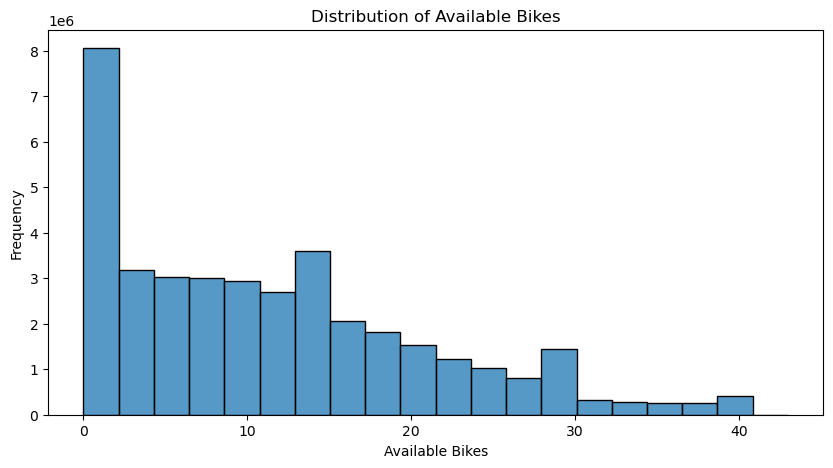

In [19]:
# Distribution of Available Bikes
plt.figure(figsize=(10,5))
sns.histplot(dublin_bikes_cleaned['AVAILABLE BIKES'], bins=20)
plt.title("Distribution of Available Bikes")
plt.xlabel("Available Bikes")
plt.ylabel("Frequency")
plt.show()

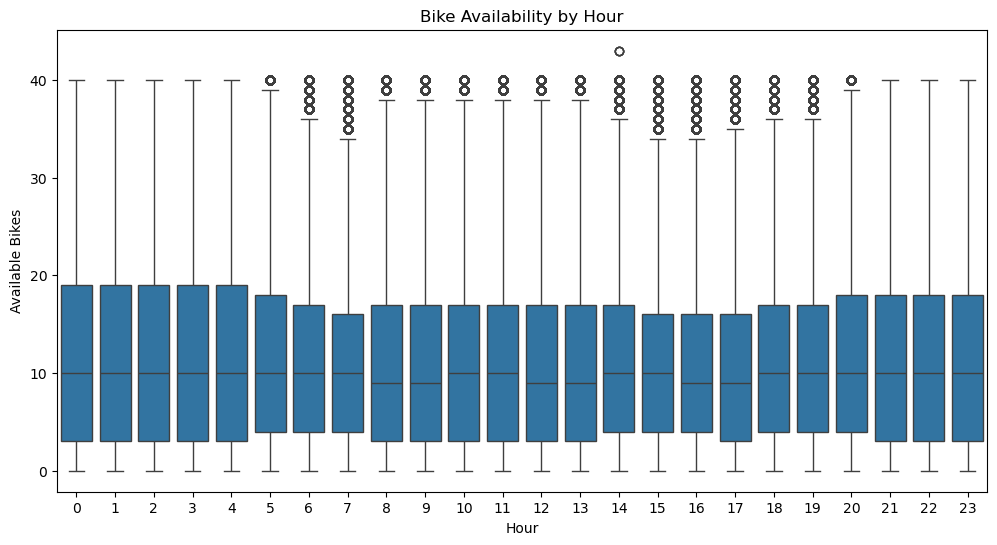

In [20]:
# Bikes availability by Hour
plt.figure(figsize=(12,6))
sns.boxplot(x='HOUR', y='AVAILABLE BIKES', data=dublin_bikes_cleaned)
plt.title("Bike Availability by Hour")
plt.xlabel("Hour")
plt.ylabel("Available Bikes")
plt.show()


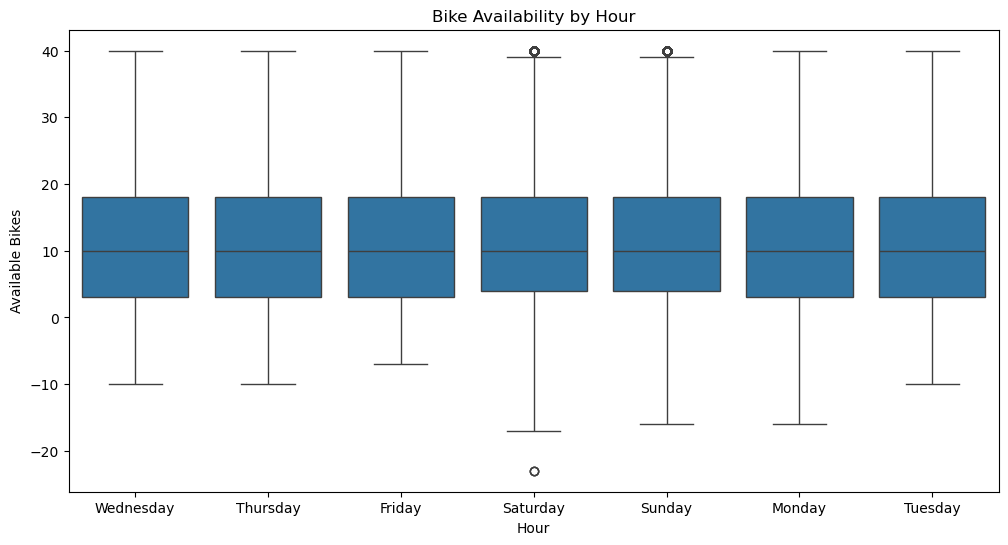

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x='DAY', y='USED_BIKES', data=dublin_bikes_cleaned)
plt.title("Bike Availability by Hour")
plt.xlabel("Hour")
plt.ylabel("Available Bikes")
plt.show()


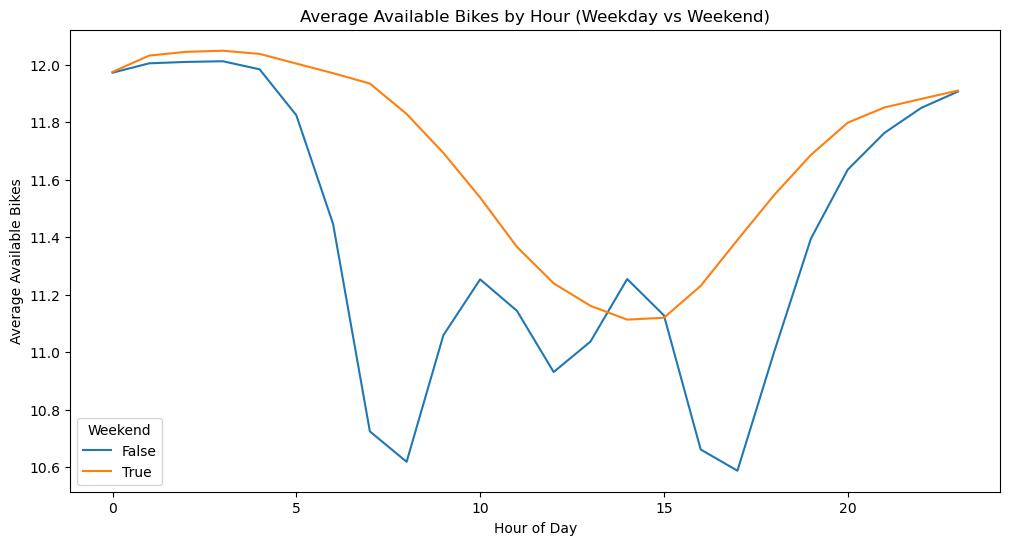

In [22]:
# Calculating mean availability per hour split by weekend/weekday
hourly_avg = dublin_bikes_cleaned.groupby(['WEEKEND', 'HOUR'])['AVAILABLE BIKES'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=hourly_avg, x='HOUR', y='AVAILABLE BIKES', hue='WEEKEND')
plt.title("Average Available Bikes by Hour (Weekday vs Weekend)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Available Bikes")
plt.legend(title="Weekend")
plt.show()


C:\Users\Soundarya\AppData\Local\Temp\ipykernel_9176\1651457427.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=station_avg.values, y=station_avg.index, palette='coolwarm')


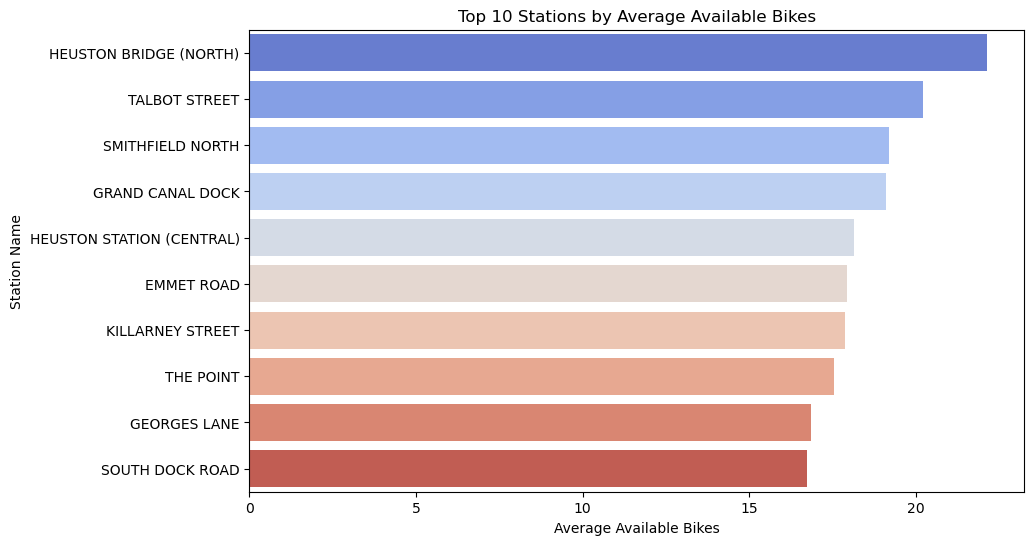

In [23]:
#Station-Level Heatmap
station_avg = dublin_bikes_cleaned.groupby('NAME')['AVAILABLE BIKES'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=station_avg.values, y=station_avg.index, palette='coolwarm')
plt.title("Top 10 Stations by Average Available Bikes")
plt.xlabel("Average Available Bikes")
plt.ylabel("Station Name")
plt.show()

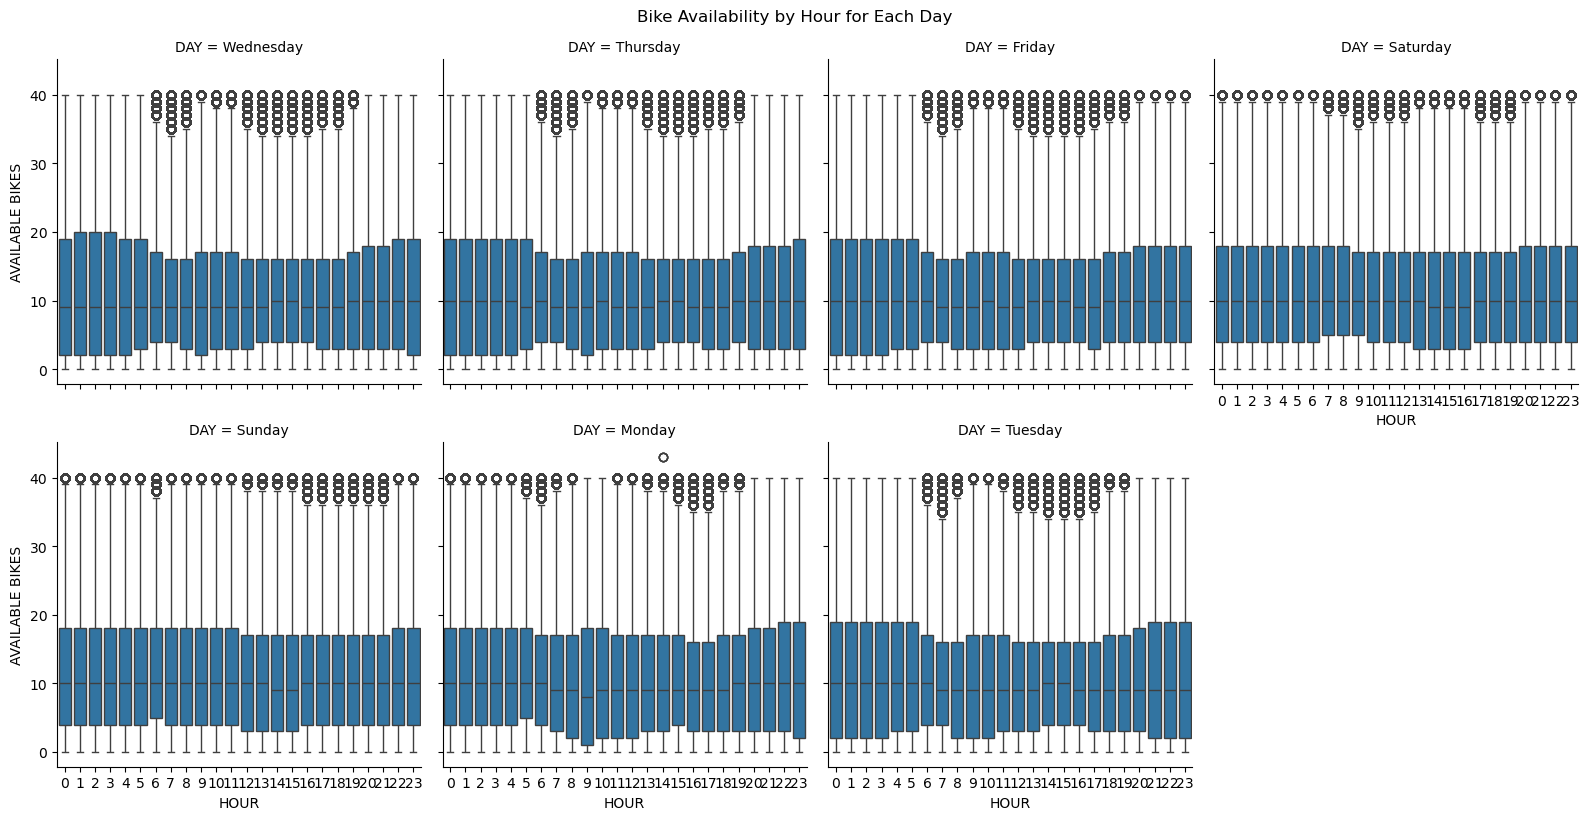

In [24]:
#Hourly Distribution by Day
g = sns.FacetGrid(dublin_bikes_cleaned, col='DAY', col_wrap=4, height=4)
g.map(sns.boxplot, 'HOUR', 'AVAILABLE BIKES', order=range(24))
g.fig.suptitle("Bike Availability by Hour for Each Day", y=1.02)
plt.show()


In [25]:
# Pearson (assumes linearity + normality)
pearson_corr = dublin_bikes_cleaned[['BIKE STANDS', 'AVAILABLE BIKES']].corr(method='pearson')

# Spearman (non-parametric, ranks)
spearman_corr = dublin_bikes_cleaned[['BIKE STANDS', 'AVAILABLE BIKES']].corr(method='spearman')

print("Pearson Correlation:\n", pearson_corr)
print("\nSpearman Correlation:\n", spearman_corr)


Pearson Correlation:
                  BIKE STANDS  AVAILABLE BIKES
BIKE STANDS         1.000000         0.203324
AVAILABLE BIKES     0.203324         1.000000

Spearman Correlation:
                  BIKE STANDS  AVAILABLE BIKES
BIKE STANDS         1.000000         0.158871
AVAILABLE BIKES     0.158871         1.000000


There is a weak but positive association between station size and number of available bikes.

In practice: larger stations tend to have more bikes, but it’s not a strong rule — other factors (location, time, demand) also matter.

**“Stations with more stands tend to have more bikes available.”**